In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from tqdm.notebook import tqdm, trange
import hdf5plugin
import h5py
import time

In [4]:
!h5dump -H /asap3/petra3/gpfs/p11/2023/data/11018188/raw/scan_frames/Scan_384/Scan_384_data_000001.h5

HDF5 "/asap3/petra3/gpfs/p11/2023/data/11018188/raw/scan_frames/Scan_384/Scan_384_data_000001.h5" {
GROUP "/" {
   GROUP "entry" {
      ATTRIBUTE "NX_class" {
         DATATYPE  H5T_STRING {
            STRSIZE 8;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_ASCII;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
      }
      GROUP "data" {
         ATTRIBUTE "NX_class" {
            DATATYPE  H5T_STRING {
               STRSIZE 7;
               STRPAD H5T_STR_NULLTERM;
               CSET H5T_CSET_ASCII;
               CTYPE H5T_C_S1;
            }
            DATASPACE  SCALAR
         }
         DATASET "data" {
            DATATYPE  H5T_STD_U32LE
            DATASPACE  SIMPLE { ( 41, 4362, 4148 ) / ( H5S_UNLIMITED, 4362, 4148 ) }
            ATTRIBUTE "image_nr_high" {
               DATATYPE  H5T_STD_U64LE
               DATASPACE  SCALAR
            }
            ATTRIBUTE "image_nr_low" {
               DATATYPE  H5T_STD_U64LE
              

In [5]:
!h5dump -H /asap3/petra3/gpfs/p11/2023/data/11018188/raw/server_log/Scan_logs/Scan_384.log

h5dump error: unable to open file "/asap3/petra3/gpfs/p11/2023/data/11018188/raw/server_log/Scan_logs/Scan_384.log"


In [5]:
scan_nr = 384
scanpath=f"/asap3/petra3/gpfs/p11/2024/data/11018732/raw/scan_frames/Scan_{scan_nr}"

In [6]:
# read in one h5 file for visualization and preliminary data check
dir_main = f'/asap3/petra3/gpfs/p11/2024/data/11018732/raw/scan_frames/Scan_{scan_nr}/'
file_name = dir_main+f'Scan_{scan_nr}_data_000010.h5'
with h5py.File(file_name,'r') as f:
    data_test = f['/entry/data/data'][0:-1]

In [7]:
data_test_std = np.std(data_test,axis=0)

In [8]:
mask_test = np.ones_like(data_test[0])
mask_test[np.where(data_test[0]>1e7)] = 0

In [9]:
data_test_masked = data_test*mask_test

In [82]:
# generate mask based on the statistics

data_mean = np.mean(data_test,axis=0)
data_std = np.std(data_test,axis = 0)
data_med = np.median(data_test,axis=0)
small_value = 0.01
data_fluc = np.float64(data_mean/(data_std + small_value))



<IPython.core.display.Javascript object>


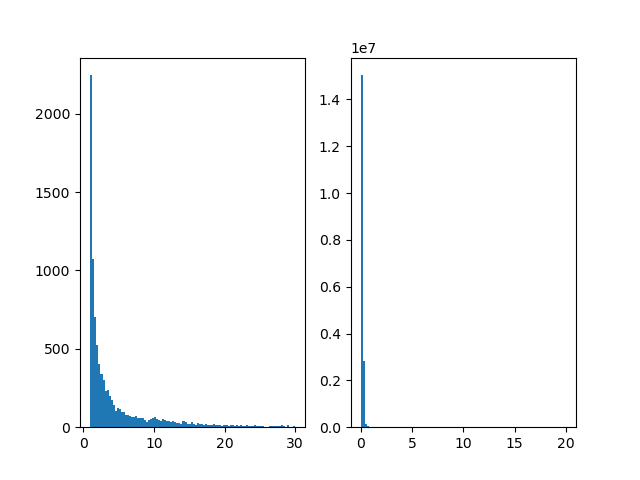

(array([1.5035854e+07, 2.8465470e+06, 1.5395000e+05, 3.2095000e+04,
        8.6600000e+03, 2.8070000e+03, 1.3760000e+03, 9.1100000e+02,
        6.4700000e+02, 4.5300000e+02, 3.6700000e+02, 2.9500000e+02,
        2.4600000e+02, 2.1500000e+02, 2.1900000e+02, 2.0300000e+02,
        1.9500000e+02, 1.7300000e+02, 1.5100000e+02, 1.3700000e+02,
        1.1000000e+02, 9.6000000e+01, 8.8000000e+01, 7.1000000e+01,
        6.2000000e+01, 6.1000000e+01, 5.4000000e+01, 4.6000000e+01,
        5.2000000e+01, 4.0000000e+01, 4.0000000e+01, 3.6000000e+01,
        3.6000000e+01, 3.4000000e+01, 2.8000000e+01, 2.7000000e+01,
        3.0000000e+01, 3.7000000e+01, 3.0000000e+01, 3.4000000e+01,
        3.0000000e+01, 2.9000000e+01, 1.7000000e+01, 2.4000000e+01,
        1.9000000e+01, 3.3000000e+01, 2.4000000e+01, 2.8000000e+01,
        3.3000000e+01, 3.5000000e+01, 2.1000000e+01, 2.3000000e+01,
        3.5000000e+01, 2.5000000e+01, 2.3000000e+01, 1.9000000e+01,
        3.6000000e+01, 2.0000000e+01, 2.4000000e

In [83]:
plt.figure()
plt.subplot(121)
plt.hist(data_mean.flatten(),bins=100,range=[1,30])
plt.subplot(122)
plt.hist(data_std.flatten(),bins=100,range=[0,20])

In [87]:
mask_statistic = (data_mean<10) * (data_std > 0.1) 

mask_statistic = mask_statistic.astype(bool)
# mask_statistic = np.logical_not(mask_statistic)

<IPython.core.display.Javascript object>


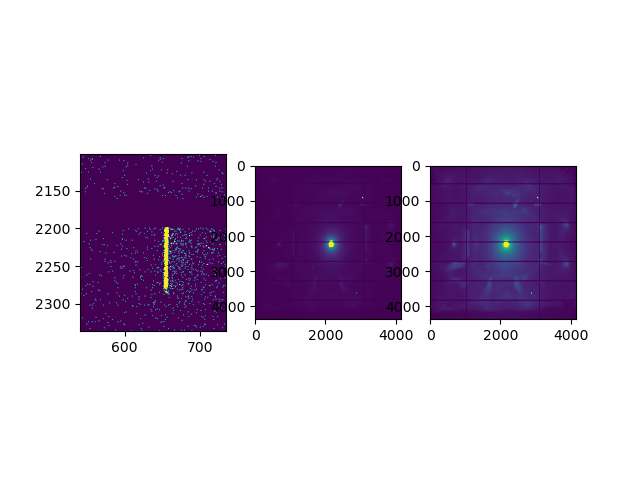

In [92]:
%matplotlib notebook
plt.figure
plt.subplot(131)
plt.imshow(mask_statistic*data_test[22],vmax=1)
plt.subplot(132)
plt.imshow(data_mean*mask_test,vmax=1)

plt.subplot(133)
plt.imshow(data_std,vmax=1)

<IPython.core.display.Javascript object>


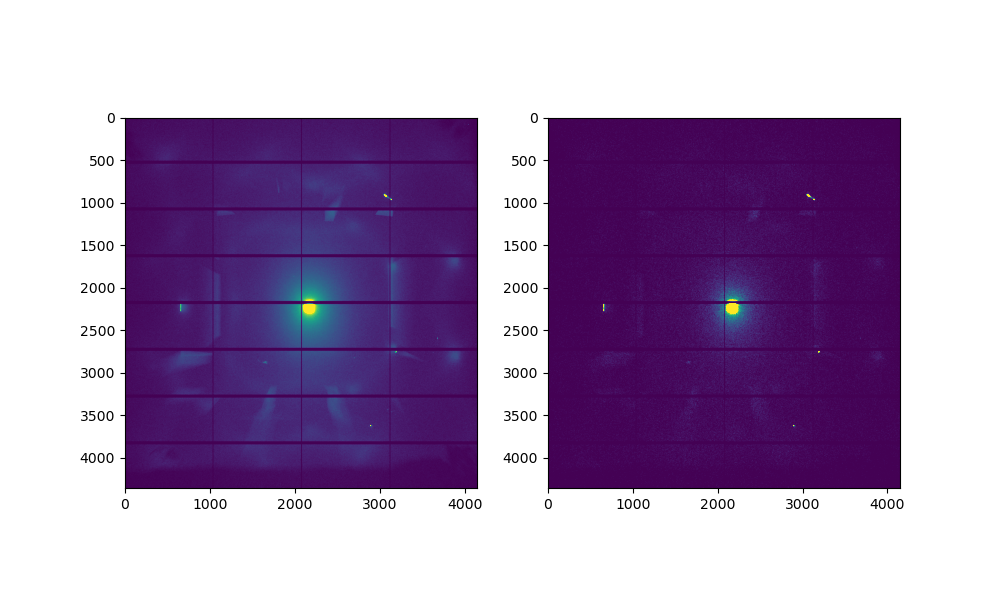

In [10]:
%matplotlib notebook
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.imshow(data_test_std,vmax=1)
plt.subplot(122)
plt.imshow(data_test_masked[22],vmax=1)

<IPython.core.display.Javascript object>


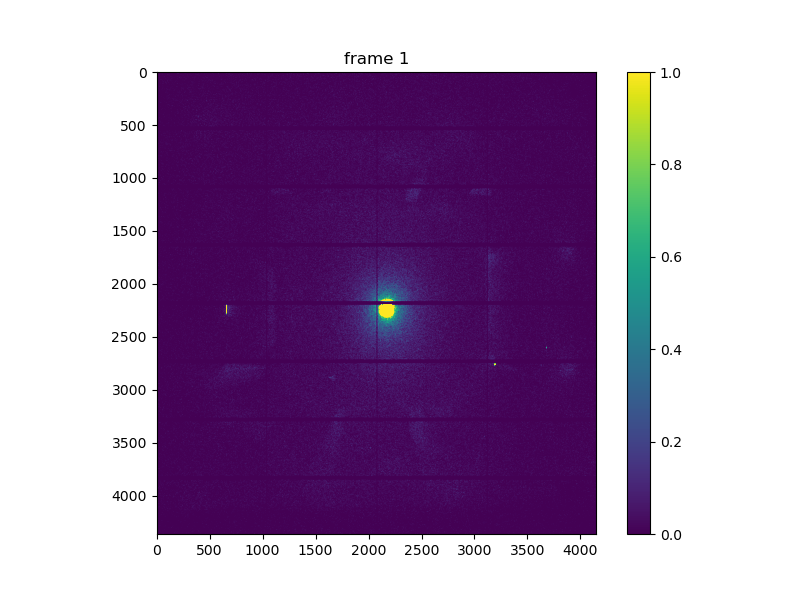

In [11]:
import matplotlib.animation as animation
%matplotlib notebook
fig = plt.figure(figsize=(8,6))
i=0
im = plt.imshow(data_test_masked[0],animated=True,vmax=1,vmin=0)
plt.title(f'frame {i}')
plt.colorbar()

def updatefig(*args):
    global i
    if (i<39):
        i += 1
    else:
        i=0
    plt.title(f'frame {i}')
    im.set_array(data_test_masked[i])
    return im,
ani = animation.FuncAnimation(fig, updatefig,  blit=True, frames=range(0,data_test.shape[0]))
# ani.save(f'scan_429.gif', writer=animation.PillowWriter(fps=10),dpi=150)
plt.show()

In [12]:
# if generate local mask, use this roi
roi = [900,980,3030,3140]
mask = np.zeros(data_test.shape[1:])
mask[roi[0]:roi[1],roi[2]:roi[3]] = 1


#if generate a ring mask, use the following one
# x,y = np.meshgrid(np.linspace(0,data_test.shape[2],data_test.shape[2]),np.linspace(0,data_test.shape[1],data_test.shape[1]))

# x_c = 2164
# y_c = 2230

# x1 = 3075
# y1 = 935

# r = np.sqrt((x_c-x1)**2+(y_c-y1)**2)
# width = 100
# circle_1 = np.zeros(data_test.shape[1:])
# circle_2 = np.zeros(data_test.shape[1:])

# circle_1[(x-x_c)**2+(y-y_c)**2<(r+width)**2] = 1
# circle_2[(x-x_c)**2+(y-y_c)**2>(r-width)**2] = 1

# mask = circle_1*circle_2

<IPython.core.display.Javascript object>


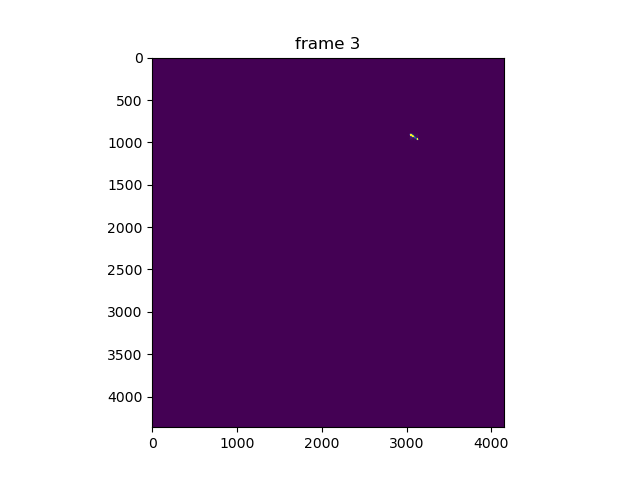

In [13]:
plt.figure()
plt.imshow(mask*data_test_masked[22],vmax=1)

In [14]:

names = []
for filename in tqdm(sorted(os.listdir(scanpath))):
    if filename.endswith(".h5"):
        names.append(filename)
names = names[0:-1]

  0%|          | 0/42 [00:00<?, ?it/s]

In [15]:
from multiprocessing import Pool
from itertools import repeat
def STXM(filename,scanpath):
    value_list = []
    f=h5py.File(scanpath +"/"+ filename,"r")
    data_current = f['/entry/data/data'][:]
    #print('hi')
    for j in trange(np.shape(data_current)[0]):
        mask_badpixel = np.ones((np.shape(data_current)[1],np.shape(data_current)[2]))
        mask_badpixel[data_current[0]>100000] = 0 

        value = np.sum(np.sum(data_current[j,:,:]*mask*mask_badpixel))
        value_list.append(value)
    return value_list

#for filename in tqdm(sorted(os.listdir(scanpath))):
#    if filename.endswith("Far.nxs"):
        
with Pool(50) as p:
    t1 = time.time()
    listing = np.array(p.starmap(STXM, zip(names, repeat(scanpath)))) 
    #listing = p.starmap(STXM, zip(names, repeat(scanpath)))
    t2 = time.time()
    t_diff = t2 - t1
print("Done, " + str(len(names)) + " lines took " + str(t_diff) + " seconds.")

Done, 41 lines took 37.66817808151245 seconds.


<IPython.core.display.Javascript object>


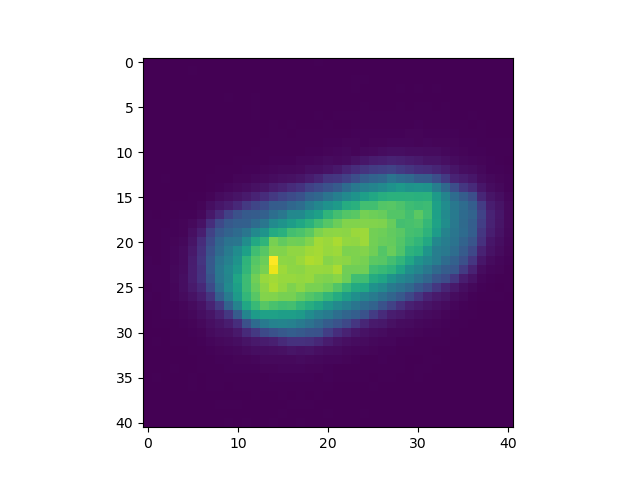

In [16]:
%matplotlib notebook
plt.imshow(listing.T)
plt.show()